In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes = True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\KIRAN\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
data = pd.read_csv('Black_friday_train.csv')

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
data.shape

(550068, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

There are 173638 missing values in Product_Category_2 and 383247 in Product_Category_3

In [8]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

# EDA

In [9]:
data['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

Text(0.5, 1.0, 'GenderC Count')

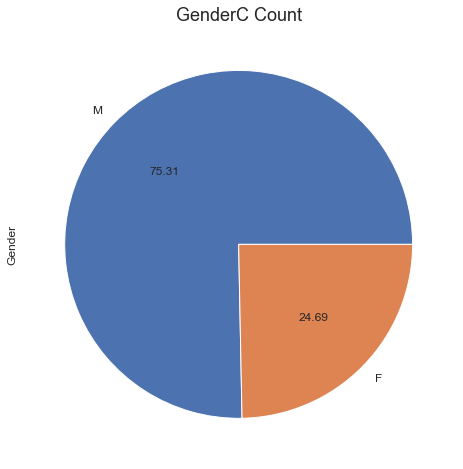

In [10]:
data['Gender'].value_counts().plot.pie(autopct = '%.2f',figsize = (10,8),fontsize=12)
plt.title('Gender Count',fontsize=18)

There are more males than females

In [11]:
data.groupby("Gender").mean()["Purchase"]

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

On average the male gender spends more money on purchase contrary to female, and it is possible to also observe this trend by adding the total value of purchase.

Text(0.5, 1.0, 'Purchase Distribution')

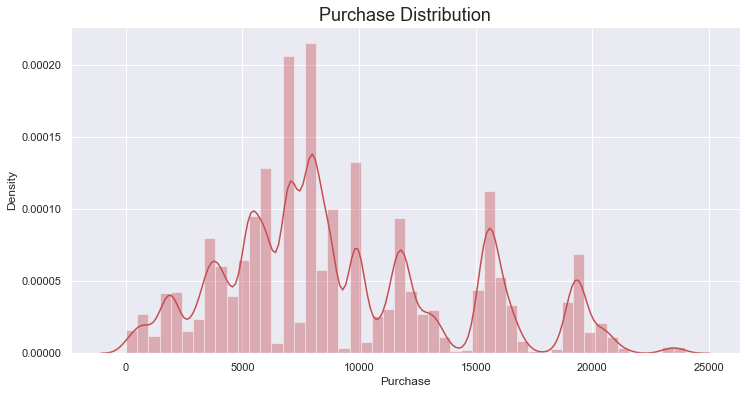

In [12]:
plt.figure(figsize = (12,6))
sns.distplot(data['Purchase'],color = 'r')
plt.title("Purchase Distribution",fontsize = 18)

We can observe that purchase amount is repeating for many customers.This may be because on Black Friday many are buying discounted products in large numbers and kind of follows a Gaussian Distribution.

Text(0.5, 1.0, 'Boxplot of Purchase')

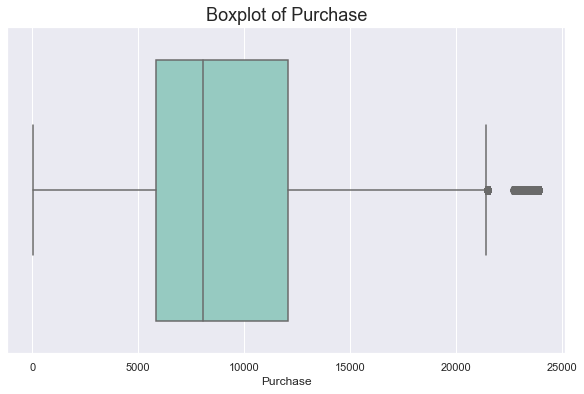

In [13]:
plt.figure(figsize = (10,6))
sns.boxplot(x = data['Purchase'],palette = "Set3")
plt.title("Boxplot of Purchase",fontsize = 18)

In [14]:
data["Purchase"].skew()

0.6001400037087128

The purchase is right skewed

Text(0.5, 1.0, 'Age Count')

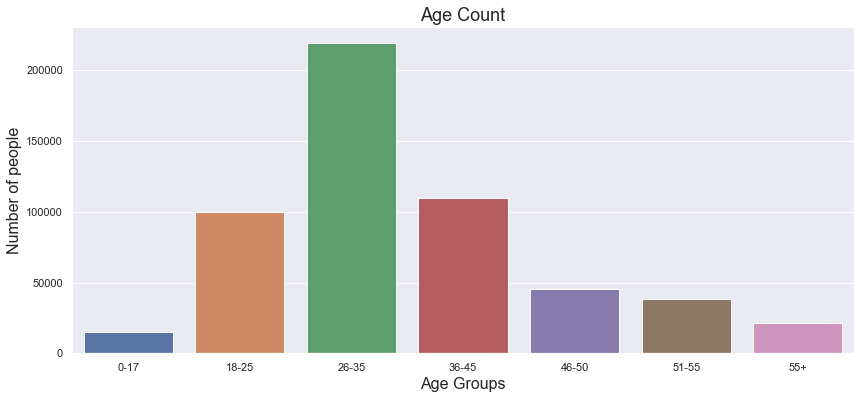

In [15]:
age_count = data['Age'].value_counts().sort_index()
plt.figure(figsize = (14,6))
sns.barplot(age_count.index,age_count.values)
plt.xlabel('Age Groups',fontsize = 16)
plt.ylabel('Number of people',fontsize = 16)
plt.title('Age Count',fontsize = 18)



Age 26-35 Age group makes the most no of purchases in the age group.


Text(0.5, 1.0, 'Occupation Count')

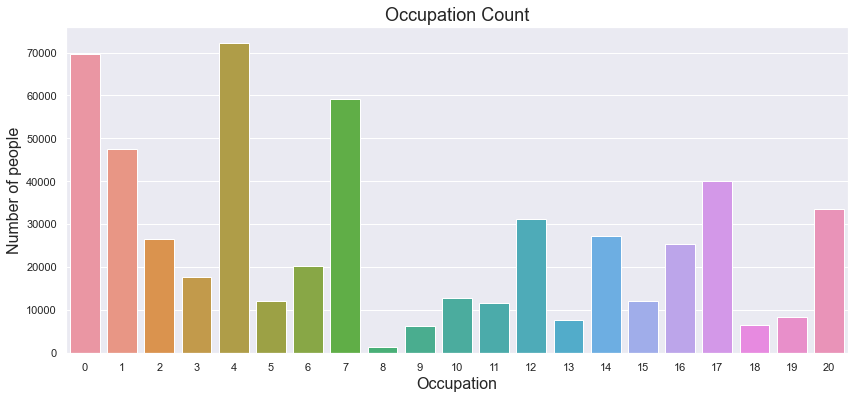

In [16]:
occupation_count = data['Occupation'].value_counts().sort_index()
plt.figure(figsize = (14,6))
sns.barplot(occupation_count.index,occupation_count.values)
plt.xlabel('Occupation',fontsize = 16)
plt.ylabel('Number of people',fontsize = 16)
plt.title('Occupation Count',fontsize = 18)

In [17]:
data['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

Text(0.5, 1.0, 'City Count')

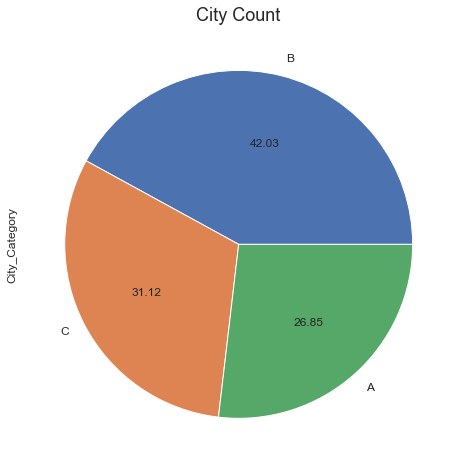

In [18]:
data['City_Category'].value_counts().plot.pie(autopct = '%.2f',figsize = (10,8),fontsize=12)
plt.title('City Count',fontsize=18)



It is observed that city category B has made the most number of puchases.

In [19]:
data['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

Text(0.5, 1.0, 'Marital Count')

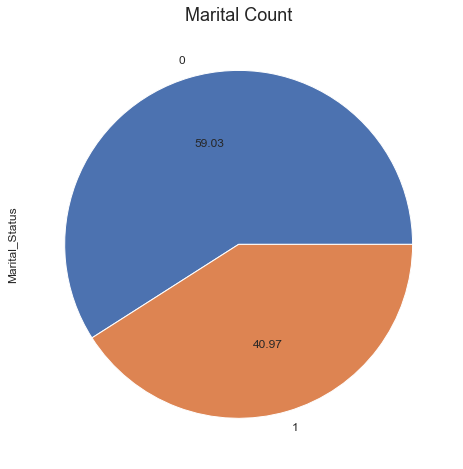

In [20]:
data['Marital_Status'].value_counts().plot.pie(autopct = '%.2f',figsize = (10,8),fontsize=12)
plt.title('Marital Count',fontsize=18)

There are more unmarried people in the dataset who purchase more

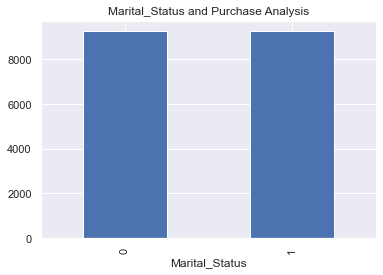

In [21]:
data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

The average purchase amount of married and unmarried people are the same.

In [22]:
occ_mean = pd.DataFrame(data.groupby('Occupation').mean()['Purchase']).reset_index()
occ_mean

,Occupation,Purchase
0,0,9124.428588
1,1,8953.193270
2,2,8952.481683
3,3,9178.593088
4,4,9213.980251
5,5,9333.149298
6,6,9256.535691
7,7,9425.728223
8,8,9532.592497
9,9,8637.743761


Text(0.5, 1.0, 'Occupation Count')

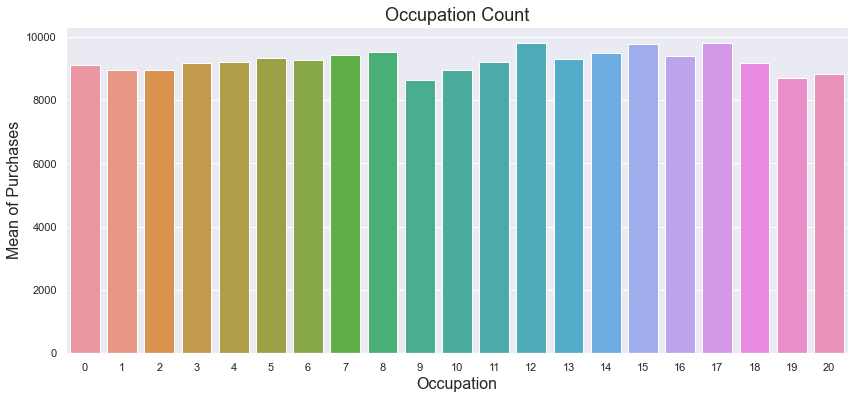

In [23]:
plt.figure(figsize = (14,6))
sns.barplot(occ_mean['Occupation'],occ_mean['Purchase'])
plt.xlabel('Occupation',fontsize = 16)
plt.ylabel('Mean of Purchases',fontsize = 16)
plt.title('Occupation Count',fontsize = 18)

Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will have the highest amounts of purchases.

<AxesSubplot:xlabel='Age', ylabel='count'>

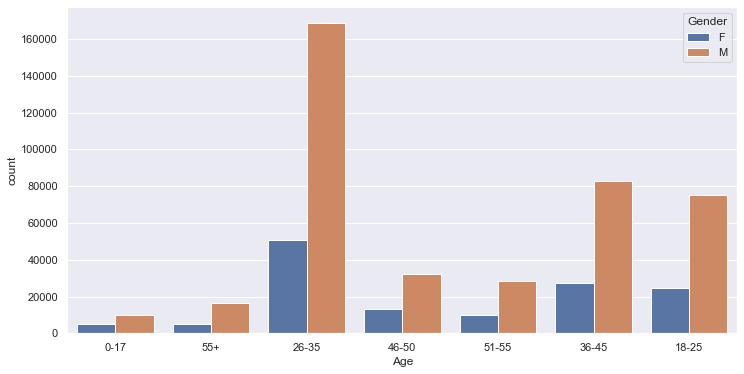

In [24]:
plt.figure(figsize = (12,6))
sns.countplot(data['Age'],hue = data['Gender'])

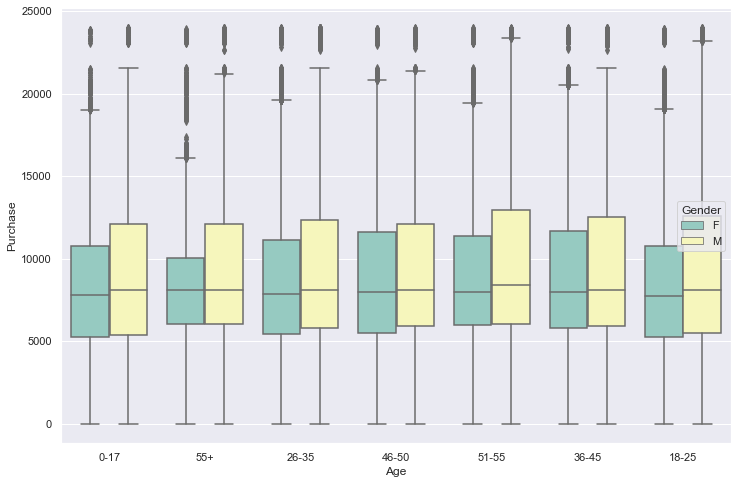

In [25]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Age' , y = "Purchase" , data = data , hue = "Gender",palette = "Set3" )
plt.show()

<AxesSubplot:xlabel='City_Category', ylabel='count'>

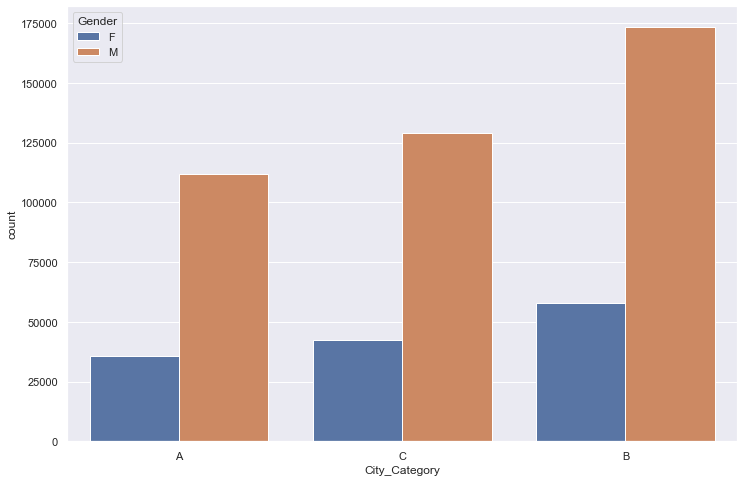

In [26]:
plt.figure(figsize = (12,8))
sns.countplot(data['City_Category'],hue = data['Gender'])

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

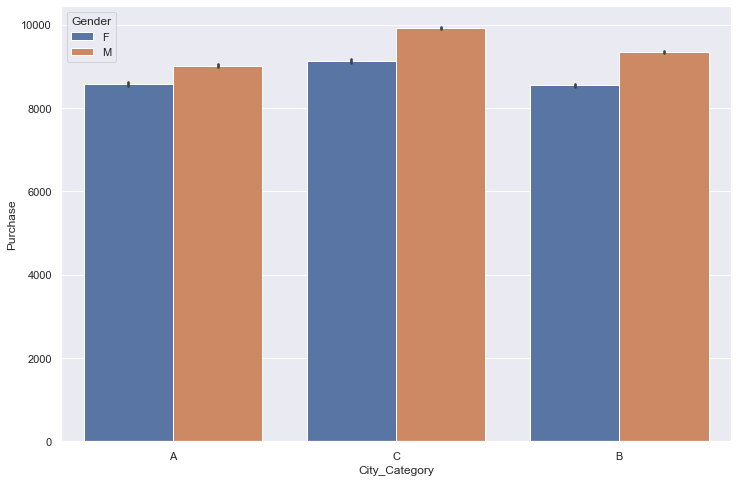

In [27]:
plt.figure(figsize = (12,8))
sns.barplot(data['City_Category'],data['Purchase'],hue = data['Gender'])

Text(0.5, 1.0, 'Count of Product Category 1')

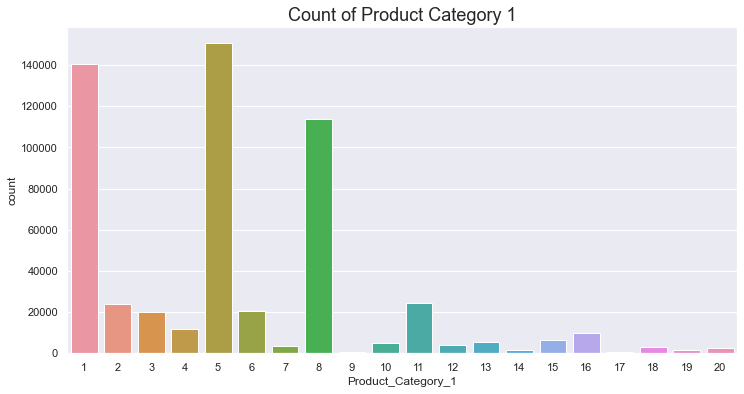

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(data['Product_Category_1'])
plt.title('Count of Product Category 1',fontsize = 18)

Text(0.5, 1.0, 'Product_Category_1 and Purchase Mean Analysis')

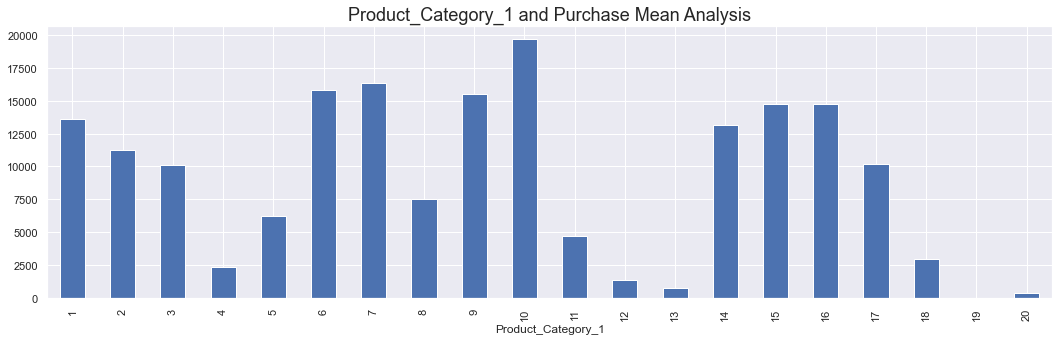

In [29]:
data.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis",fontsize = 18)

Text(0.5, 1.0, 'Product_Category_1 and Purchase Analysis')

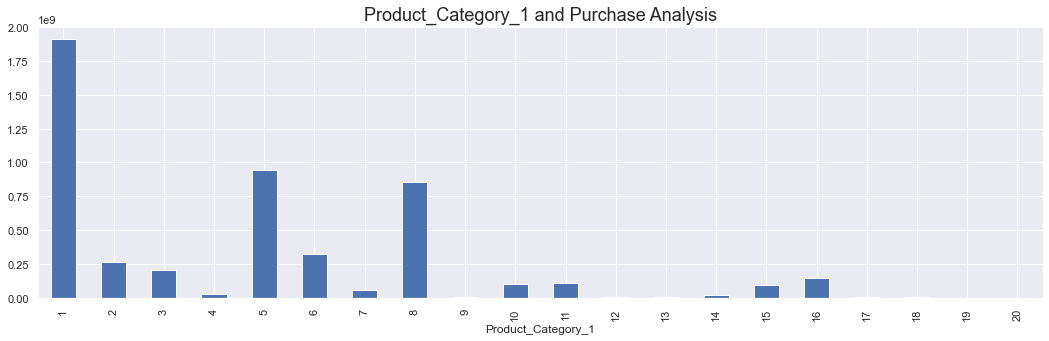

In [30]:
data.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis",fontsize = 18)

Text(0.5, 1.0, 'Count of Product Category 2')

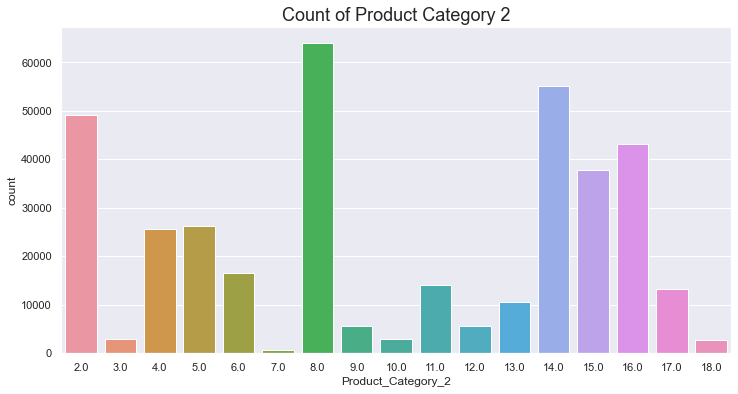

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(data['Product_Category_2'])
plt.title('Count of Product Category 2',fontsize = 18)

Text(0.5, 1.0, 'Count of Product Category 3')

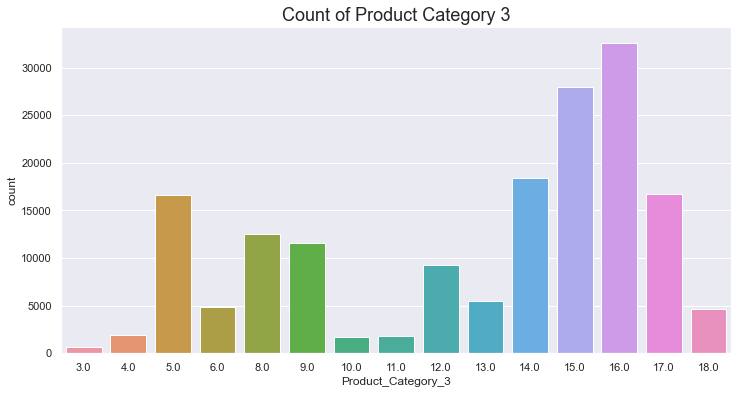

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(data['Product_Category_3'])
plt.title('Count of Product Category 3',fontsize = 18)

<AxesSubplot:>

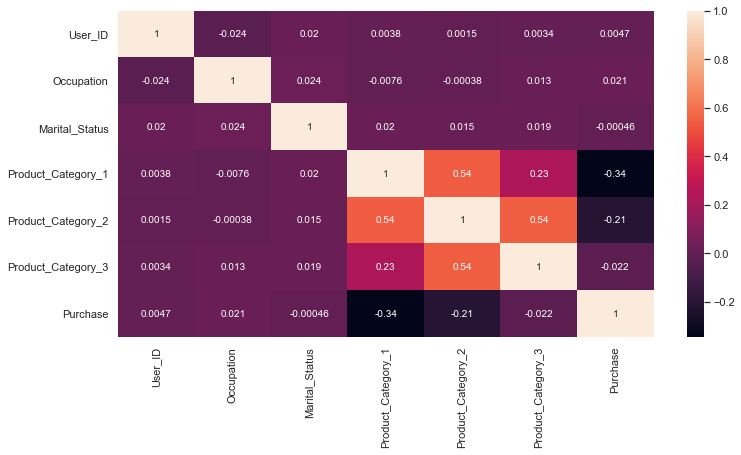

In [33]:
plt.figure(figsize = (12,6))
sns.heatmap(data.corr(),annot = True)

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
data['Gender'] = le.fit_transform(data['Gender'])

In [36]:
data['City_Category'] = le.fit_transform(data['City_Category'])

In [37]:
data['Stay_In_Current_City_Years'] = le.fit_transform(data['Stay_In_Current_City_Years'])

In [38]:
data['Age'].replace({'0-17' :17,
                  '18-25':20,
                  '26-35':30,
                  '36-45':40,
                  '46-50':47,
                  '51-55':52,
                  '55+' : 56},
                 inplace = True)

In [39]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,17,10,0,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,17,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,17,10,0,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,17,10,0,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,56,16,2,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,52,13,1,1,1,20,NaN,NaN,368
550064,1006035,P00375436,0,30,1,2,3,0,20,NaN,NaN,371
550065,1006036,P00375436,0,30,15,1,4,1,20,NaN,NaN,137
550066,1006038,P00375436,0,56,1,2,2,0,20,NaN,NaN,365


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int32  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int32  
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(3), int64(6), object(1)
memory usage: 44.1+ MB


In [41]:
data.drop('Product_Category_2',axis = 1,inplace = True)
data.drop('Product_Category_3',axis = 1,inplace = True)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  int32 
 3   Age                         550068 non-null  int64 
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  int32 
 6   Stay_In_Current_City_Years  550068 non-null  int32 
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int32(3), int64(6), object(1)
memory usage: 35.7+ MB


In [43]:
data.corr()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
User_ID,1.000000,-0.033474,0.038904,-0.023971,0.022859,-0.030737,0.020443,0.003825,0.004716
Gender,-0.033474,1.000000,-0.006943,0.117291,-0.004515,0.014660,-0.011603,-0.045594,0.060346
Age,0.038904,-0.006943,1.000000,0.099766,0.119101,-0.003923,0.310996,0.060932,0.015682
Occupation,-0.023971,0.117291,0.099766,1.000000,0.034479,0.030005,0.024280,-0.007618,0.020833
City_Category,0.022859,-0.004515,0.119101,0.034479,1.000000,0.019946,0.039790,-0.014364,0.061914
Stay_In_Current_City_Years,-0.030737,0.014660,-0.003923,0.030005,0.019946,1.000000,-0.012819,-0.004213,0.005422
Marital_Status,0.020443,-0.011603,0.310996,0.024280,0.039790,-0.012819,1.000000,0.019888,-0.000463
Product_Category_1,0.003825,-0.045594,0.060932,-0.007618,-0.014364,-0.004213,0.019888,1.000000,-0.343703
Purchase,0.004716,0.060346,0.015682,0.020833,0.061914,0.005422,-0.000463,-0.343703,1.000000


In [44]:
data.drop(['User_ID','Product_ID'],axis = 1,inplace = True)

In [45]:
X = data.drop('Purchase',axis = 1)

In [46]:
y = data['Purchase']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 123)

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [50]:
lr.fit(X_train,y_train)

LinearRegression()

In [51]:
lr.intercept_

10345.315893884936

In [52]:
y_pred = lr.predict(X_test)

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [54]:
mean_absolute_error(y_test, y_pred)

3602.2064833900713

In [55]:
mean_squared_error(y_test, y_pred)

22099033.78084105

In [56]:
r2_score(y_test, y_pred)

0.12413924879421756

In [57]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  4700.960942279892


In [58]:
import statsmodels.api as sm
X = sm.add_constant(X)
model1_1 = sm.OLS(y, X).fit()
print(model1_1.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                 1.117e+04
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        23:22:46   Log-Likelihood:            -5.4315e+06
No. Observations:              550068   AIC:                         1.086e+07
Df Residuals:                  550060   BIC:                         1.086e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [59]:
df1 = data[['Gender','Age','Occupation','Marital_Status','Product_Category_1','Purchase']]

In [60]:
X = df1.drop('Purchase',axis = 1)
y = df1['Purchase']

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [62]:
model2 = LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [63]:
print("Model Intercept: ",model2.intercept_)
print("MOdel Slope: ",model2.coef_[0])

Model Intercept:  10598.037096631611
MOdel Slope:  509.6936779430434


In [64]:
y_pred = model2.predict(X_train)
print("R2 Squared Value: ",r2_score(y_train,y_pred)*100)

R2 Squared Value:  12.15458135314994


In [65]:
X = sm.add_constant(X)
model2_1 = sm.OLS(y, X).fit()
print(model2_1.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                 1.523e+04
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        23:22:47   Log-Likelihood:            -5.4324e+06
No. Observations:              550068   AIC:                         1.086e+07
Df Residuals:                  550062   BIC:                         1.086e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.061e+04     25

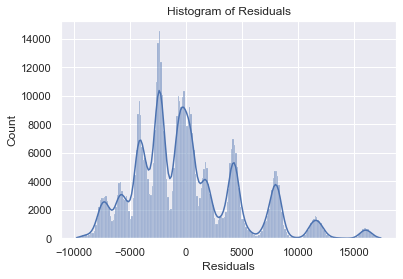

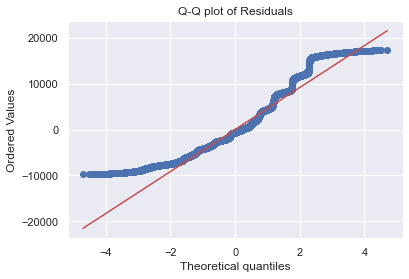

In [69]:
##Normality test
from scipy import stats

residuals = model2_1.resid
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()


stats.probplot(residuals, plot=plt)
plt.title('Q-Q plot of Residuals')
plt.show()

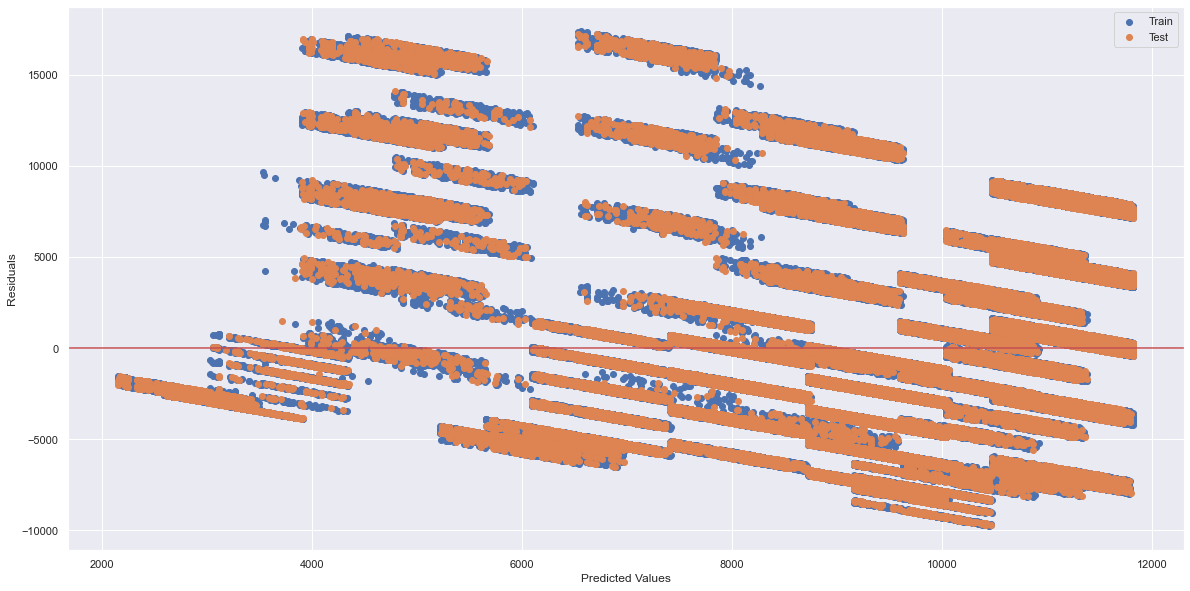

In [73]:
#Constant variance test
plt.figure(figsize = (20,10))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred

plt.scatter(y_pred_train, residuals_train, label='Train')
plt.scatter(y_pred, residuals_test, label='Test')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

full_model = sm.OLS(data['Purchase'], sm.add_constant(data[['Gender','Age','Occupation','Marital_Status','Stay_In_Current_City_Years','Product_Category_1','Purchase']])).fit()

full_vif = [variance_inflation_factor(full_model.model.exog, i) for i in range(full_model.model.exog.shape[1])]
print('Full model VIF:', full_vif)

reduced_model = sm.OLS(data['Purchase'], sm.add_constant(data[['Gender','Age','Occupation','Marital_Status','Product_Category_1','Purchase']])).fit()

reduced_vif = [variance_inflation_factor(reduced_model.model.exog, i) for i in range(reduced_model.model.exog.shape[1])]
print('Reduced model VIF:', reduced_vif)

Full model VIF: [23.469371621285664, 1.0186529087539893, 1.123252687328657, 1.0255263339496983, 1.1074089389597352, 1.001234938477357, 1.1404432265136701, 1.138449734694281]
Reduced model VIF: [21.502416242097826, 1.018536839532248, 1.1232446999794465, 1.0246704001578415, 1.1072528250624813, 1.1404397856952033, 1.1384370112159914]
